In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

def clear_variables():
    # Clear all variables except for the built-ins
    for var in list(globals()):
        if var not in ["__builtins__", "__name__", "__doc__", "__package__", "clear_variables", "get_ipython", "_ih", "_oh", "_dh", "In", "Out"]:
            del globals()[var]

# Filter 10 - LP filter xxxxx

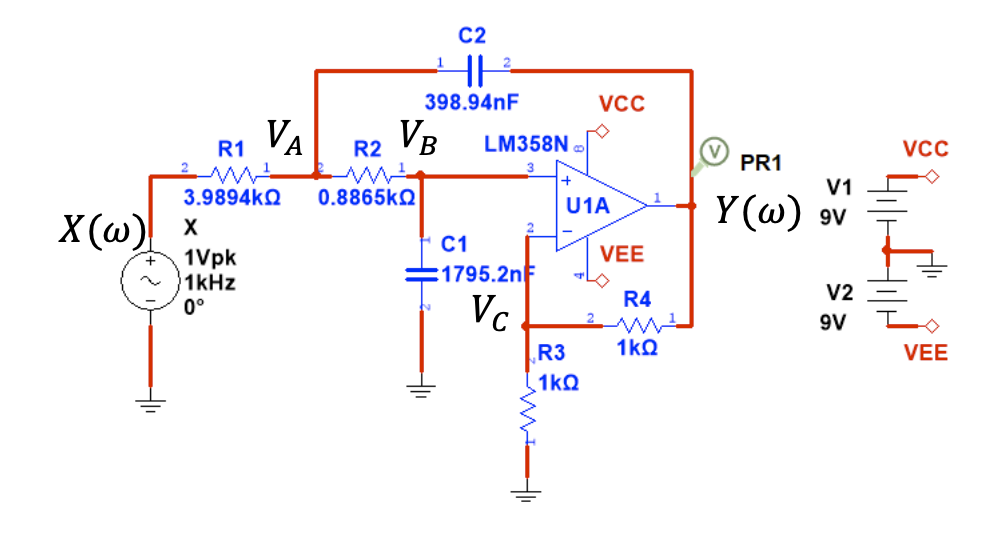

In [ ]:
X, Y, Va, Vb, Vc, R1, R2, R3, R4, C1, C2, Z1, Z2, t = symbols('X Y Va Vb Vc R1 R2 R3 R4 C1 C2 Z1 Z2 t')
omega = symbols('omega', real=True)  # Frequency variable
Z1 = 1 / (I * omega * C1)  # Impedance of capacitor C1
Z2 = 1 / (I * omega * C2)  # Impedance of capacitor C2

R1_val = 3.9894e3   # 3.9894 kΩ
R2_val = 0.8865e3   # 886.5 Ω
R3_val = 1e3        # 1 kΩ
R4_val = 1e3        # 1 kΩ
C1_val = 1795.2e-9  # 1795.2 nF
C2_val = 398.94e-9  # 398.94 nF

# eq_a = -(X-Va)/R1 + C2 * Derivative(Va-Y, t) + ...
# eq_b = -(Va-Vb)/R2 + C1 * Derivative(Vb, t)
# eq_c = -(Y-Vc)/R4 + Vc/R3
eq_a = -(X-Va)/R1 + (Va-Y)/Z2 + (Va-Vb)/R2
eq_b = -(Va-Vb)/R2 + Vb/Z1
eq_c = -(Y-Vc)/R4 + Vc/R3

display(eq_a)
display(eq_b)
display(eq_c)

### set up a system of linear equations in matrix form

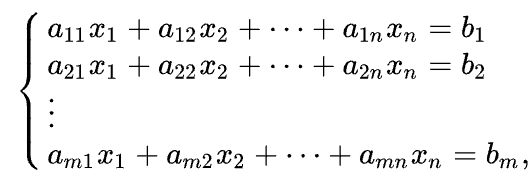 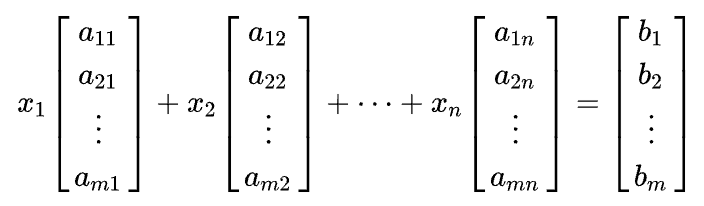



In [ ]:
# Convert to matrix form
A, B = linear_eq_to_matrix([eq_a, eq_b, eq_c], [Va, Vb, Vc])
A, B

⎛⎡         1    1       -1              ⎤                 ⎞
⎜⎢ⅈ⋅C₂⋅ω + ── + ──      ───         0   ⎥  ⎡           X ⎤⎟
⎜⎢         R₂   R₁       R₂             ⎥  ⎢ⅈ⋅C₂⋅Y⋅ω + ──⎥⎟
⎜⎢                                      ⎥  ⎢           R₁⎥⎟
⎜⎢      -1                   1          ⎥  ⎢             ⎥⎟
⎜⎢      ───         ⅈ⋅C₁⋅ω + ──     0   ⎥, ⎢      0      ⎥⎟
⎜⎢       R₂                  R₂         ⎥  ⎢             ⎥⎟
⎜⎢                                      ⎥  ⎢     Y       ⎥⎟
⎜⎢                               1    1 ⎥  ⎢     ──      ⎥⎟
⎜⎢       0               0       ── + ──⎥  ⎣     R₄      ⎦⎟
⎝⎣                               R₄   R₃⎦                 ⎠

### define the coefficients

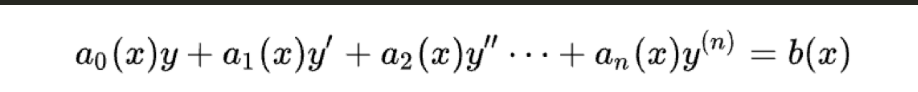

In [ ]:
A[0, 0], A[0, 1], A[0, 2]

⎡                                              X                              
⎢                                   ⅈ⋅C₂⋅Y⋅ω + ──                             
⎢                                              R₁                           X 
⎢ⅈ⋅C₂⋅Y⋅ω + ───────────────────────────────────────────────────────────── + ──
⎢             2 ⎛         1              1           ⎞ ⎛         1    1 ⎞   R₁
⎢           R₂ ⋅⎜ⅈ⋅C₁⋅ω + ── - ──────────────────────⎟⋅⎜ⅈ⋅C₂⋅ω + ── + ──⎟     
⎢               ⎜         R₂     2 ⎛         1    1 ⎞⎟ ⎝         R₂   R₁⎠     
⎢               ⎜              R₂ ⋅⎜ⅈ⋅C₂⋅ω + ── + ──⎟⎟                        
⎢               ⎝                  ⎝         R₂   R₁⎠⎠                        
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                        1    1                               
⎢                               ⅈ⋅C₂⋅ω + ── + ──                              
⎢                                        R₂   R₁    

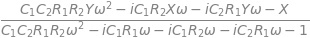

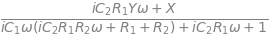

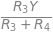

In [ ]:
# Solve the system for Va, Vb, and Vc
V_solution = A.LUsolve(B)
display(V_solution)

# Extract expressions for Va, Vb, and Vc
Va_solution = V_solution[0]
Vb_solution = V_solution[1]
Vc_solution = V_solution[2]

display(Va_solution.simplify()) 
display(Vb_solution.simplify()) 
display(Vc_solution.simplify()) 

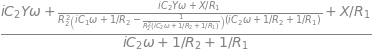

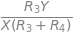

In [ ]:
# Apply the op-amp constraint: Vb = Vc = (R3 / (R3 + R4)) * Y
Vb_constrained = Vc_constrained = (R3 / (R3 + R4)) * Y
K = R3 / (R3 + R4)

# Substitute into expressions
Va_constrained = Va_solution.subs({Vb: Vb_constrained, Vc: Vc_constrained})
# Va_constrained = Va_solution.subs({Vb: Vb_constrained})
display(Va_constrained)

H_omega = simplify(Vc_solution / X)
display(H_omega)

In [ ]:
# TODO: continue

# Filter 11 - HP filter

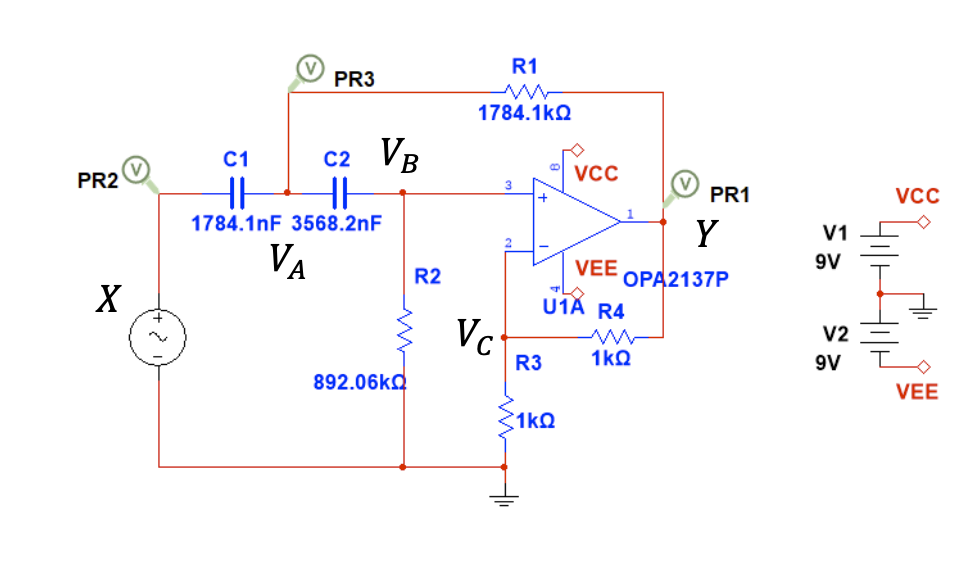

In [ ]:
clear_variables()
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

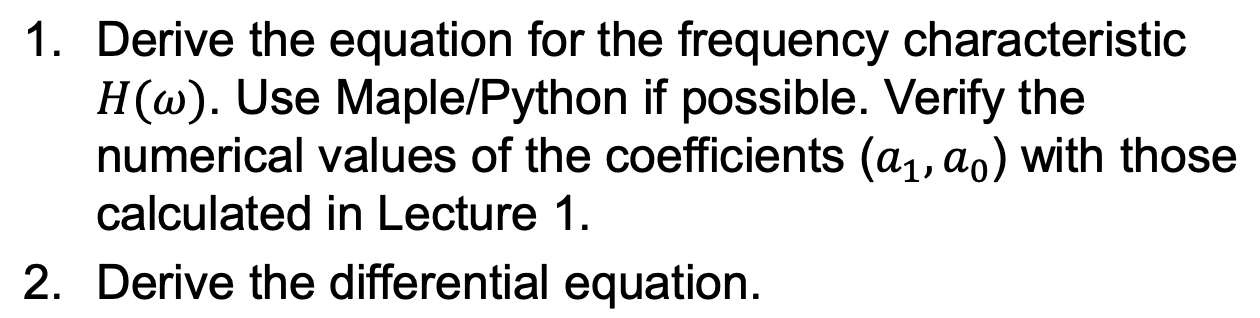

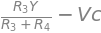

In [ ]:
X, Y, Va, Vb, Vc, R1, R2, R3, R4, C1, C2, Z1, Z2, t = symbols('X Y Va Vb Vc R1 R2 R3 R4 C1 C2 Z1 Z2 t')
omega = symbols('omega', real=True)  # Frequency variable
K = symbols('K')  # gain constant

R1_val = 1784.1e3   # kΩ
R2_val = 892.06e3   # kΩ
R3_val = 1e3        # kΩ
R4_val = 1e3        # kΩ
C1_val = 1784.1e-9  # nF
C2_val = 3568.2e-9  # nF

eq_a = -(X-Va)/Z1 + (Va-Y)/R1 + (Va-Vb)/Z2
eq_b = -(Va-Vb)/Z2 + Vb/R2
eq_c = (R3/(R3+R4)) * Y - Vc

display(eq_a)
display(eq_b)
display(eq_c)

constraints

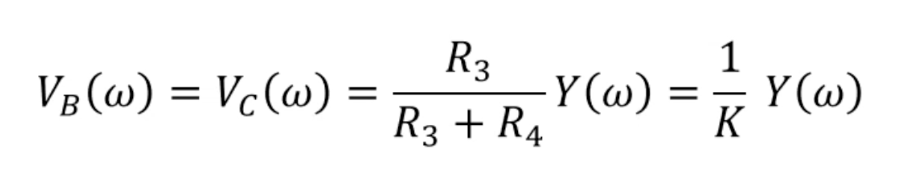

In [ ]:
# K = (R3 / (R3 + R4))**(-1)
Vb_constrained = Vc_constrained = 1/K * Y
display(Vb_constrained)
display(Vc_constrained)

# defining the equations with the constraints
eq_a = eq_a.subs({Vb: Vb_constrained, Vc: Vc_constrained})
eq_b = eq_b.subs({Vb: Vb_constrained, Vc: Vc_constrained})

solutions = simplify(linsolve([eq_a, eq_b], Va, Y))
solutions = solutions.args[0] # Extract the solution from the dictionary
solutions = solutions.subs({Vb: Vb_constrained})
solutions

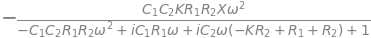

In [ ]:
# impedances
Z1_expr = 1 / (I * omega * C1)
Z2_expr = 1 / (I * omega * C2)

# Va_sol = simplify(solutions[0]) # Va
# display(Va_sol)

Y_sol = simplify(solutions[1]) # Y
Y_sol_subs = Y_sol.subs({Z1:Z1_expr, Z2:Z2_expr}).simplify()
Y_sol_subs

### reorganizing

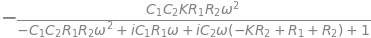

In [ ]:
H_omega = Y_sol_subs / X
H_omega

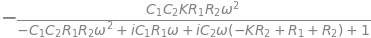

In [ ]:
H_omega = H_omega.together()
num, denom = H_omega.as_numer_denom()

display(H_omega)

### define new symbols for Y and X to avoid strange

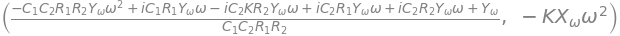

In [ ]:
Y_omega, X_omega = symbols('Y_omega X_omega')

lhs = expand(denom * Y_omega)
rhs = expand(num * X_omega)

lhs_norm = lhs / (C1*C2*R1*R2) #normalizing
rhs_norm = rhs / (C1*C2*R1*R2)

lhs_norm, rhs_norm

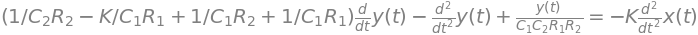

In [ ]:
# Define time domain functions
x = Function('x')(t)
y = Function('y')(t)

# Replace terms in lhs
lhs_time = lhs_norm.subs({
    Y_omega * omega**2: y.diff(t, 2),
    Y_omega * I * omega: y.diff(t),
    Y_omega : y
})

# Replace terms in rhs
rhs_time = rhs_norm.subs({
    X_omega * omega**2: x.diff(t, 2)
})

lhs_time = lhs_time.together().expand().collect([y.diff(t, 2), y.diff(t, 1), y])
rhs_time = rhs_time.together()

diff_eq = Eq(lhs_time, rhs_time)

diff_eq

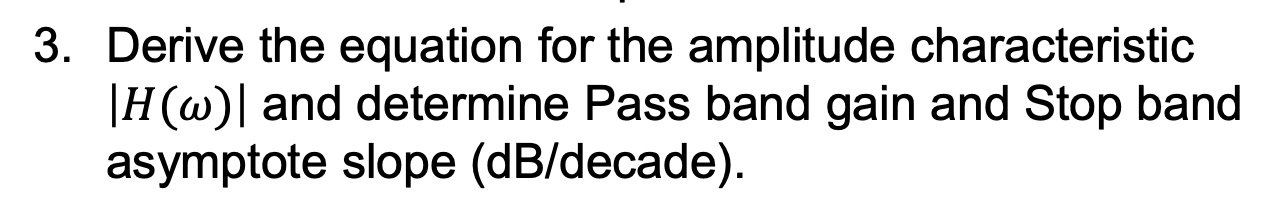

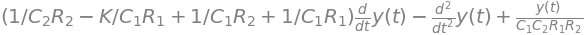

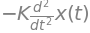

In [ ]:
# rewriting H_omega to a standard form

a1, a0 = symbols('a1 a0')

lhs, rhs = diff_eq.lhs, diff_eq.rhs
display(lhs, rhs)
# print(lhs, rhs)

lhs = lhs.subs({(1/(C2*R2) - K/(C1*R1) + 1/(C1*R2) + 1/(C1*R1)) : a1, (1/(C1*C2*R1*R2)) : a0})
lhs = lhs.subs({Derivative(y, (t, 2)) : I*omega**2, Derivative(y, t) : I * omega, y : 1})
rhs = rhs.subs({Derivative(x, (t, 2)) : I*omega**2})
display(lhs, rhs)

### simply evaluaton in the limits

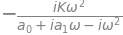

In [ ]:
H_omega = rhs / lhs
display(H_omega)

# checking for limits when omega is 0 and infinity (finding the asymptotes at high and low frequencies)
low_freq = limit(H_omega, omega, 0)
high_freq = limit(H_omega, omega, oo)
display(low_freq, high_freq)

#### instead of just 0, you need to factor out the dominant behavior instead of taking the limit directly. The trick is to isolate the ${\omega}$ term from the expression.

In [ ]:
# Step 1: Factor out omega**2
H_factored = simplify(H_omega / (I * omega)**2)

# Step 2: Take the low-frequency limit of the *scaled* function
low_freq_asymptote = limit(H_factored, omega, 0)

# Step 3: Multiply the result back by (jω)^2
H_LF = simplify(low_freq_asymptote * (I * omega)**2)

H_LF = H_LF.subs({a0 : 1/(C1*C2*R1*R2)})

display(H_LF) # low frequency with a0 sustituted

In [ ]:
# Compute dB magnitude at ω and 10ω
mag_db_omega = 20 * log(abs(H_LF), 10)
mag_db_10omega = mag_db_omega.subs(omega, 10 * omega)
display(mag_db_omega)
display(mag_db_10omega)

# LF slope over a decade
slope_db_per_decade = simplify(mag_db_10omega - mag_db_omega)
display(slope_db_per_decade)

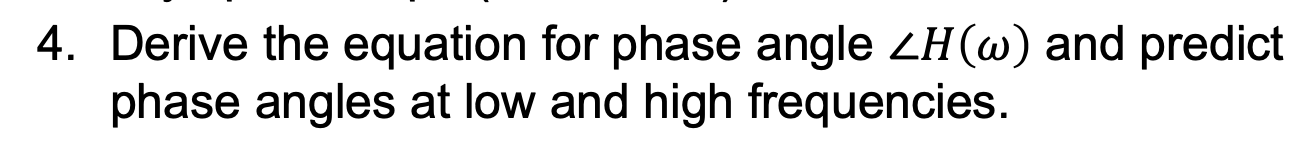

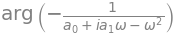

In [ ]:
omega, a0, a1, K = symbols('omega a0 a1 K', real=True, positive=True)

# Transfer function
H = (I * omega)**2 * K / ((I * omega)**2 + a1 * I * omega + a0)

# Symbolic phase
H_phase = arg(H)

# Phase at low and high frequency
phase_low = simplify(limit(H_phase, omega, 0))
phase_high = simplify(limit(H_phase, omega, oo))

# Display results
display(H_phase)
display(phase_low)
display(phase_high)

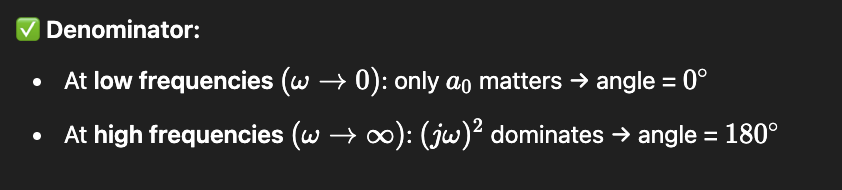

| Frequency          | Numerator Phase | Denominator Phase | ∠H(ω) |
|--------------------|-----------------|-------------------|-------|
| ω → 0             | 180°           | 0°               | 180°  |
| ω → ∞             | 180°           | 180°             | 0°    |

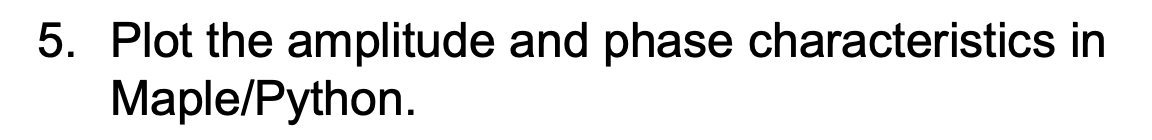

In [136]:
# Define symbolic transfer function
s = I * omega
a0 = 1
a1 = C1 * R2
b1 = C2 * (R1 + R2)
b2 = C1 * C2 * R1 * R2

H_omega = K * (a0 + a1 * s) / (1 + b1 * s + b2 * s**2)

# Substitute numeric values
H_num = H_omega.subs({
    R1: R1_val, R2: R2_val, R3: R3_val, R4: R4_val,
    C1: C1_val, C2: C2_val
})

# Convert to a numerical function
H_func = lambdify(omega, H_num, modules='numpy')

# Evaluate over frequency range
omega_vals = np.logspace(0, 10, 1000)
H_vals = H_func(omega_vals)

# Compute amplitude and phase
mag_db = 20 * np.log10(np.abs(H_vals))
phase_deg = np.angle(H_vals, deg=True)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.semilogx(omega_vals, mag_db)
ax1.set_ylabel("Magnitude [dB]")
ax1.set_title("Amplitude Response")

ax2.semilogx(omega_vals, phase_deg)
ax2.set_ylabel("Phase [degrees]")
ax2.set_xlabel("Frequency [rad/s]")
ax2.set_title("Phase Response")

plt.tight_layout()
plt.show()

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable log10 method

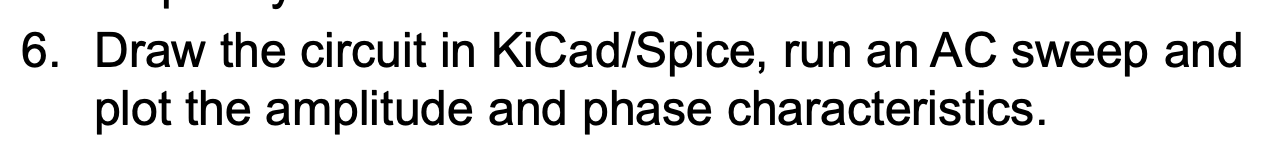

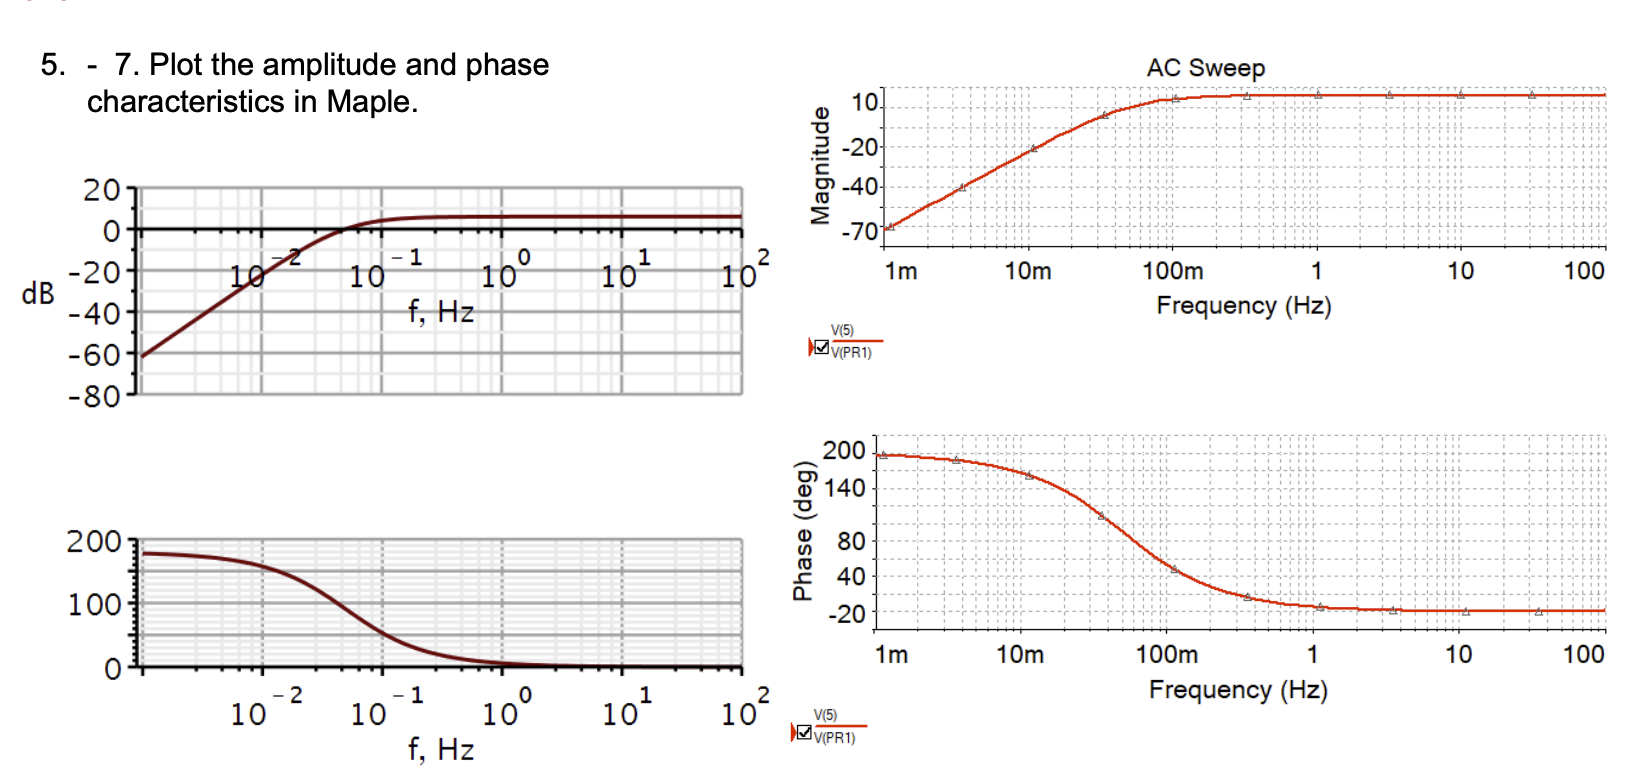

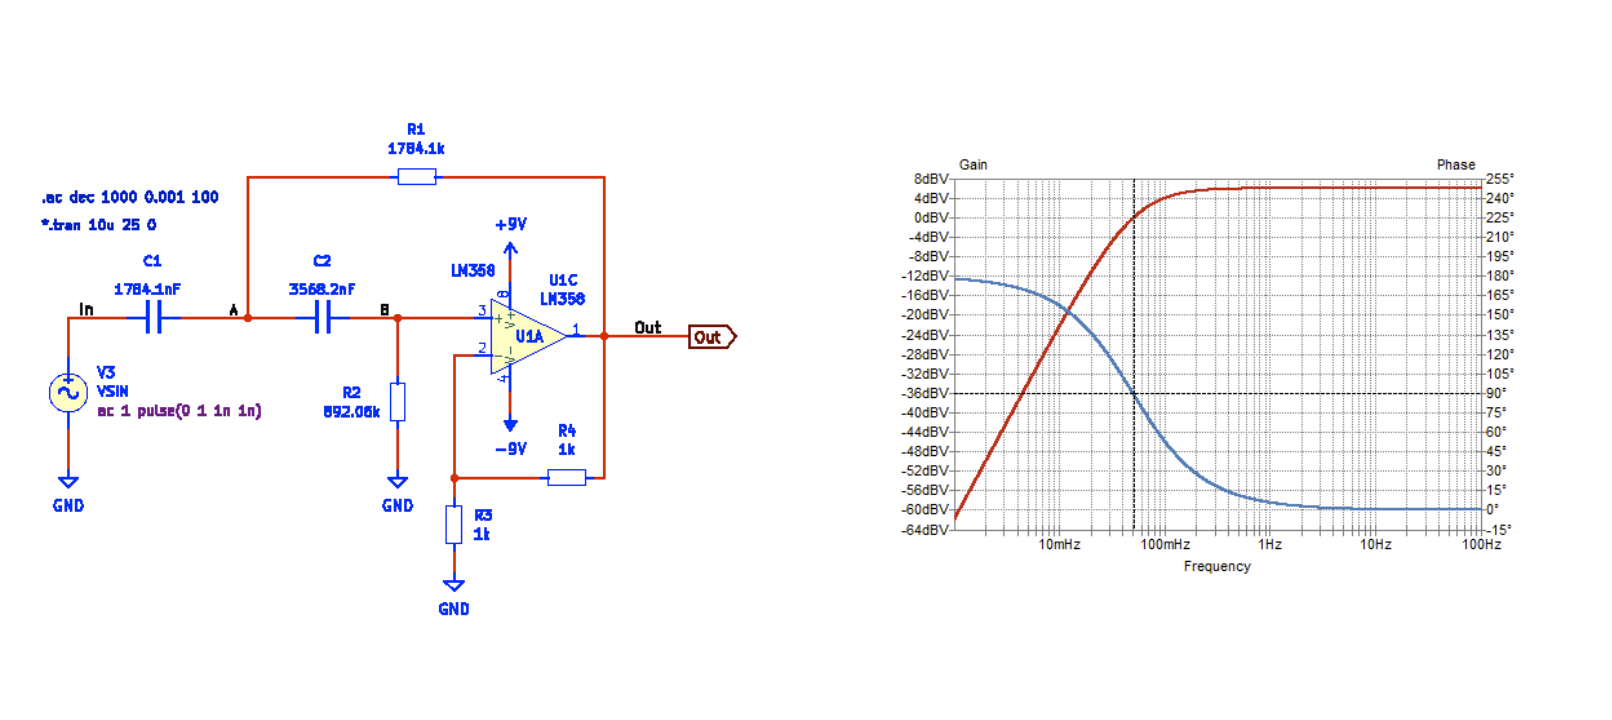

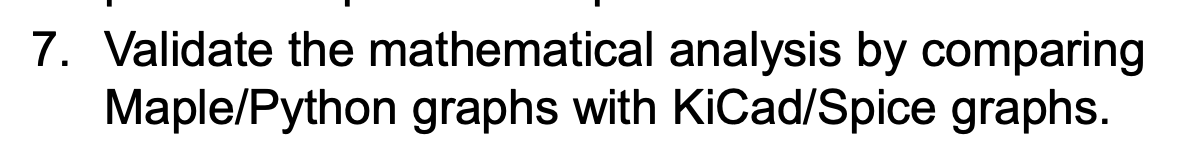

blabla

# Filter 12 - BP filter

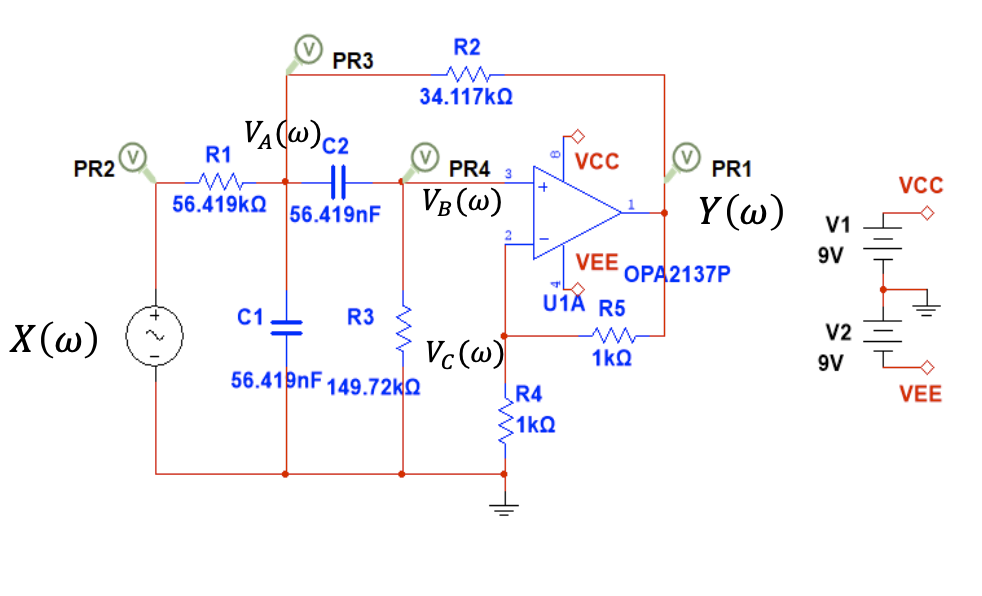